# Lesson 1 - Classify Traffic Signs

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use a subset of the [German Traffic Signs Dataset](http://benchmark.ini.rub.de/) downloadable from [here](https://drive.google.com/open?id=1zGg8vB5054B5by1jFEErxTcwY3-y4kl-), that comes from [Udacity](www.udacity.com) Self-Driving Car Nanodegree

In [4]:
# !unzip traffic-signs-data.zip

import pickle

def load_pickled_data(file, columns):
    """
    Loads pickled training and test data.
    
    Parameters
    ----------
    file    : 
              Name of the pickle file.
    columns : list of strings
              List of columns in pickled data we're interested in.

    Returns
    -------
    A tuple of datasets for given columns.    
    """

    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
train_dataset_file = "train.p"
test_dataset_file = "test.p"
train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(test_dataset_file, ['features', 'labels'])

tot_size = X_train.shape[0] + X_test.shape[0]
assert( tot_size == y_train.size + y_test.size )

all_X = np.concatenate((X_train,X_test))
all_y = np.concatenate((y_train,y_test))

image_shape = all_X[0].shape
image_size = image_shape[0]


In [5]:
sign_classes, class_indices, class_counts = np.unique(y_test, return_index = True, return_counts = True)

c = sign_classes[0]
c_index = class_indices[0]
c_count = class_counts[0]

print(np.where(y_test == c))

print( len(np.where(y_test == c)[0]) )
print( len(range(c_index, c_index + c_count)) )

print(random.sample( list(np.where(y_test == c)[0]) , 10))

(array([  243,   252,   403,   579, ..., 11804, 11812, 11873, 12614]),)
60
60
[6333, 1519, 990, 4333, 6002, 4012, 10536, 243, 4570, 10381]


Class 0: Speed limit (20km/h)                                240 samples


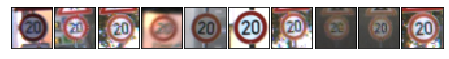

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                2700 samples


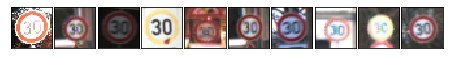

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2760 samples


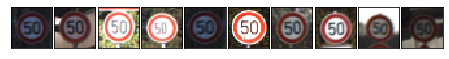

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1710 samples


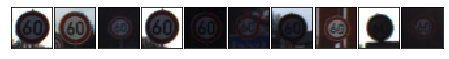

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                2430 samples


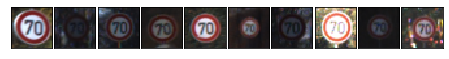

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                2280 samples


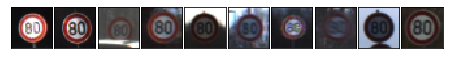

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         510 samples


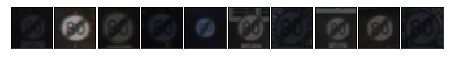

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1740 samples


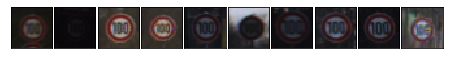

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1710 samples


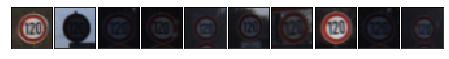

--------------------------------------------------------------------------------------

Class 9: No passing                                          1800 samples


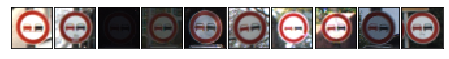

--------------------------------------------------------------------------------------

Class 10: No passing for vechiles over 3.5 metric tons        2460 samples


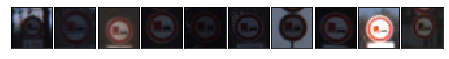

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1590 samples


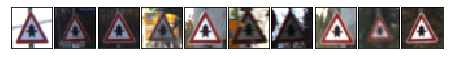

--------------------------------------------------------------------------------------

Class 12: Priority road                                       2580 samples


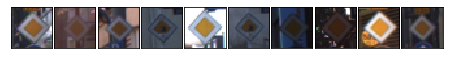

--------------------------------------------------------------------------------------

Class 13: Yield                                               2640 samples


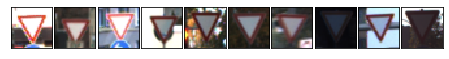

--------------------------------------------------------------------------------------

Class 14: Stop                                                960 samples


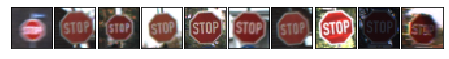

--------------------------------------------------------------------------------------

Class 15: No vechiles                                         750 samples


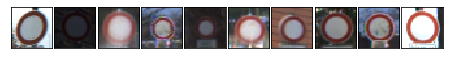

--------------------------------------------------------------------------------------

Class 16: Vechiles over 3.5 metric tons prohibited            510 samples


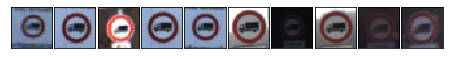

--------------------------------------------------------------------------------------

Class 17: No entry                                            1350 samples


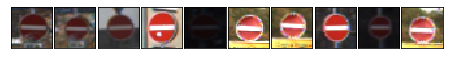

--------------------------------------------------------------------------------------

Class 18: General caution                                     1470 samples


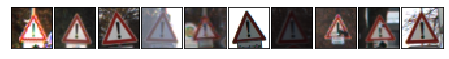

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         240 samples


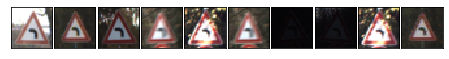

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        390 samples


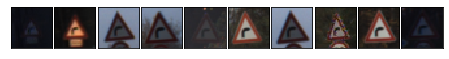

--------------------------------------------------------------------------------------

Class 21: Double curve                                        360 samples


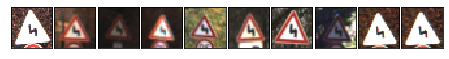

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          450 samples


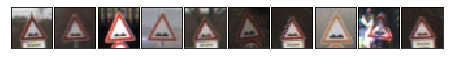

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       600 samples


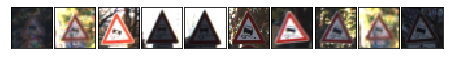

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           330 samples


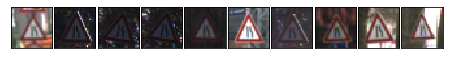

--------------------------------------------------------------------------------------

Class 25: Road work                                           1830 samples


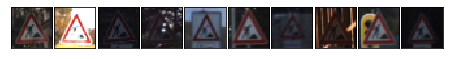

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     720 samples


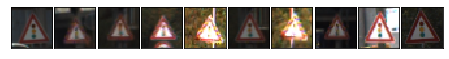

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         270 samples


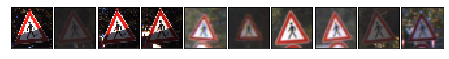

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   630 samples


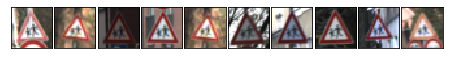

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   330 samples


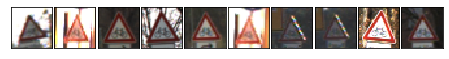

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  540 samples


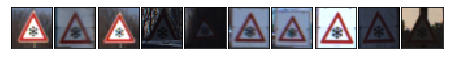

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               960 samples


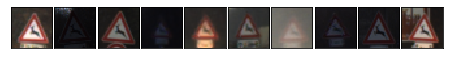

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 270 samples


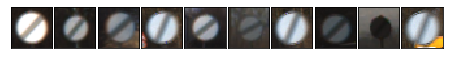

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    809 samples


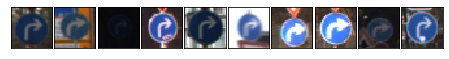

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     480 samples


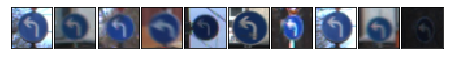

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1470 samples


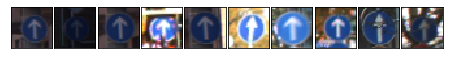

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                450 samples


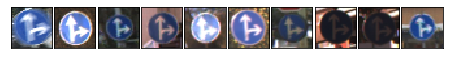

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 240 samples


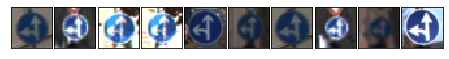

--------------------------------------------------------------------------------------

Class 38: Keep right                                          2550 samples


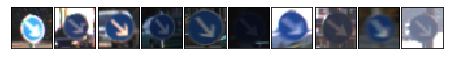

--------------------------------------------------------------------------------------

Class 39: Keep left                                           360 samples


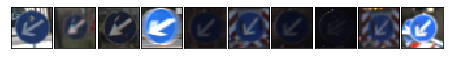

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                390 samples


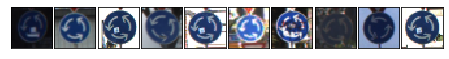

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   270 samples


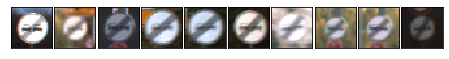

--------------------------------------------------------------------------------------

Class 42: End of no passing by vechiles over 3.5 metric tons  300 samples


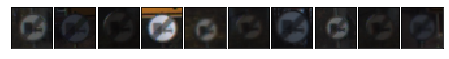

--------------------------------------------------------------------------------------



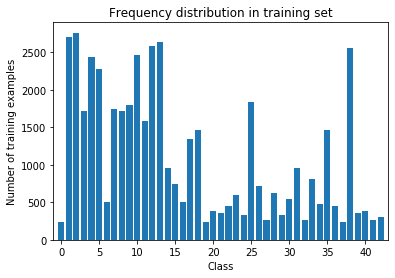

In [6]:
import random
from matplotlib import pyplot

sign_classes, class_indices, class_counts = np.unique(all_y, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample( list(np.where(all_y == c)[0]) , 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(all_X[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.title('Frequency distribution in training set')
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

In [7]:
# print(tot_size)
# i = 32000
# c_string = signnames[all_y[i]].replace(" ","_").replace("/","")
# print(c_string)
# pyplot.imshow(all_X[i])
# cv2.imwrite('ts_data/'+c_string+'_img_'+str(i)+'.png',cv2.cvtColor(all_X[i], cv2.COLOR_BGR2RGB))    

In [8]:
# The problem with fastai now is that creating a databunch from these python object is for some reason hard to do
# So let's use cv2 to write these images to file and the labels to a csv
import cv2
for i in range(tot_size):
    c_string = signnames[all_y[i]].replace(" ","_").replace("/","")
    cv2.imwrite('ts_data/'+c_string+'_img_'+str(i)+'.png',cv2.cvtColor(all_X[i], cv2.COLOR_BGR2RGB))

In [9]:
del all_X
del all_y
del X_train
del y_train
del X_test
del y_test

In [10]:
doc(ImageDataBunch)

In [11]:
path_img = Path('ts_data')
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('ts_data/No_passing_for_vechiles_over_3.5_metric_tons_img_17758.png'),
 PosixPath('ts_data/Priority_road_img_37698.png'),
 PosixPath('ts_data/Road_work_img_34433.png'),
 PosixPath('ts_data/Speed_limit_(70kmh)_img_8403.png'),
 PosixPath('ts_data/No_passing_for_vechiles_over_3.5_metric_tons_img_43375.png')]

In [12]:
regex_pattern = r'/([^/]+)_img_\d+.png$'

p = re.compile(regex_pattern)
res = p.search(str(fnames[0]))
print(f"{fnames[0]} --> {res}")
print(f"{fnames[0]} --> {res.groups()}")

ts_data/No_passing_for_vechiles_over_3.5_metric_tons_img_17758.png --> <_sre.SRE_Match object; span=(7, 66), match='/No_passing_for_vechiles_over_3.5_metric_tons_img>
ts_data/No_passing_for_vechiles_over_3.5_metric_tons_img_17758.png --> ('No_passing_for_vechiles_over_3.5_metric_tons',)


In [13]:
# Note that here we require do_flip = False or the image might be flipped! This is important for traffic signals
data = ImageDataBunch.from_name_re(path_img, fnames, regex_pattern, ds_tfms=get_transforms(do_flip=False), size=224, bs=bs
                                  ).normalize(imagenet_stats)

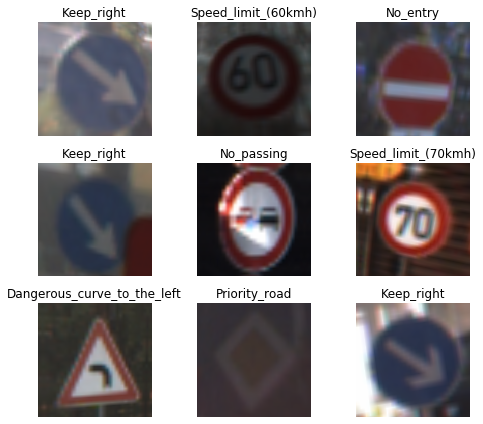

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Ahead_only', 'Beware_of_icesnow', 'Bicycles_crossing', 'Bumpy_road', 'Children_crossing', 'Dangerous_curve_to_the_left', 'Dangerous_curve_to_the_right', 'Double_curve', 'End_of_all_speed_and_passing_limits', 'End_of_no_passing', 'End_of_no_passing_by_vechiles_over_3.5_metric_tons', 'End_of_speed_limit_(80kmh)', 'General_caution', 'Go_straight_or_left', 'Go_straight_or_right', 'Keep_left', 'Keep_right', 'No_entry', 'No_passing', 'No_passing_for_vechiles_over_3.5_metric_tons', 'No_vechiles', 'Pedestrians', 'Priority_road', 'Right-of-way_at_the_next_intersection', 'Road_narrows_on_the_right', 'Road_work', 'Roundabout_mandatory', 'Slippery_road', 'Speed_limit_(100kmh)', 'Speed_limit_(120kmh)', 'Speed_limit_(20kmh)', 'Speed_limit_(30kmh)', 'Speed_limit_(50kmh)', 'Speed_limit_(60kmh)', 'Speed_limit_(70kmh)', 'Speed_limit_(80kmh)', 'Stop', 'Traffic_signals', 'Turn_left_ahead', 'Turn_right_ahead', 'Vechiles_over_3.5_metric_tons_prohibited', 'Wild_animals_crossing', 'Yield']


(43, 43)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:
learn.fit_one_cycle(4)

In [20]:
learn.save('tsd-stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

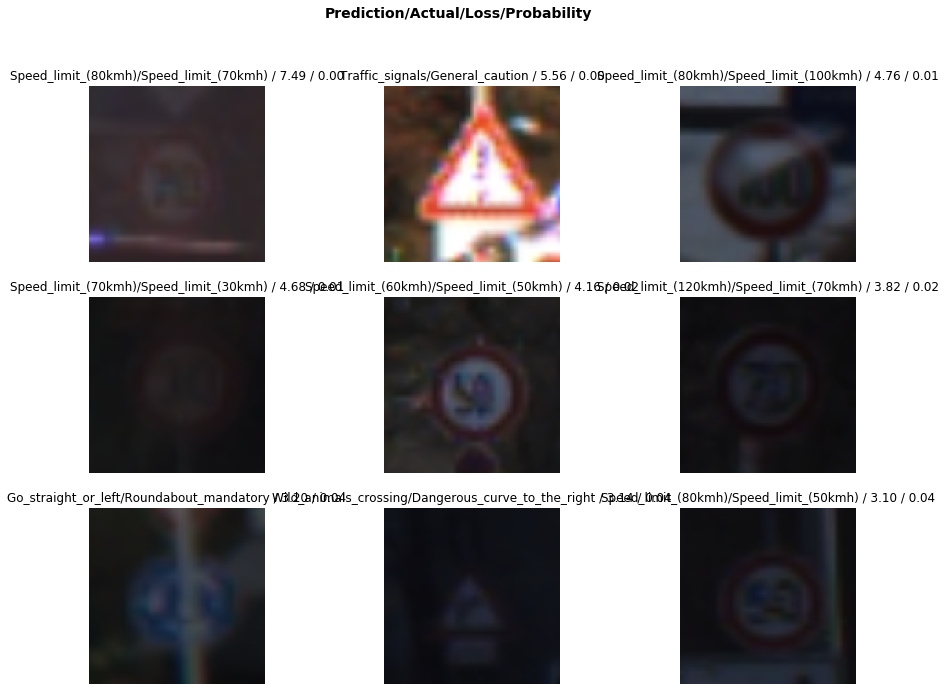

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
doc(interp.plot_top_losses)

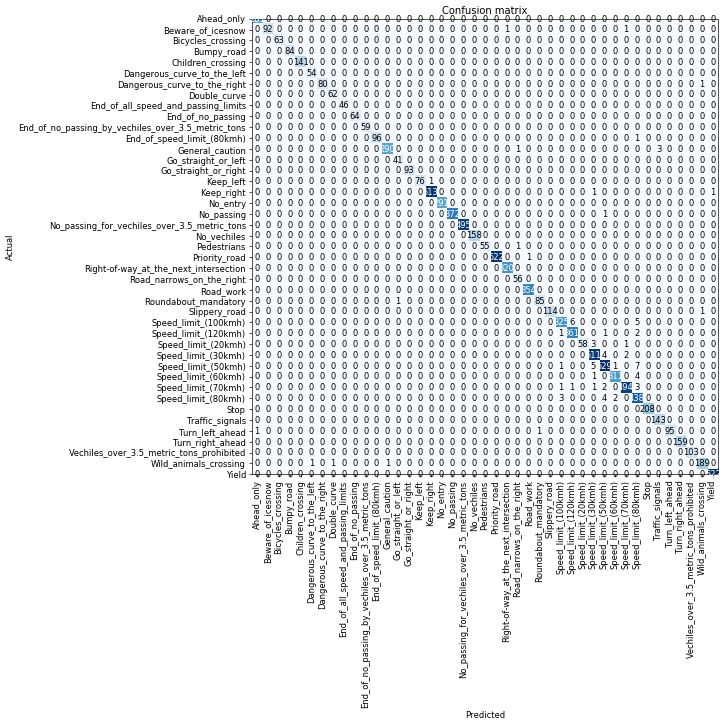

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('Speed_limit_(50kmh)', 'Speed_limit_(80kmh)', 7),
 ('Speed_limit_(100kmh)', 'Speed_limit_(120kmh)', 6),
 ('Speed_limit_(100kmh)', 'Speed_limit_(80kmh)', 5),
 ('Speed_limit_(50kmh)', 'Speed_limit_(30kmh)', 5),
 ('Speed_limit_(30kmh)', 'Speed_limit_(50kmh)', 4),
 ('Speed_limit_(60kmh)', 'Speed_limit_(80kmh)', 4),
 ('Speed_limit_(80kmh)', 'Speed_limit_(50kmh)', 4),
 ('General_caution', 'Traffic_signals', 3),
 ('Speed_limit_(20kmh)', 'Speed_limit_(30kmh)', 3),
 ('Speed_limit_(70kmh)', 'Speed_limit_(80kmh)', 3),
 ('Speed_limit_(80kmh)', 'Speed_limit_(100kmh)', 3),
 ('Speed_limit_(120kmh)', 'Speed_limit_(80kmh)', 2),
 ('Speed_limit_(30kmh)', 'Speed_limit_(70kmh)', 2),
 ('Speed_limit_(70kmh)', 'Speed_limit_(50kmh)', 2),
 ('Speed_limit_(80kmh)', 'Speed_limit_(60kmh)', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [26]:
learn.load('tsd-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (37944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Priority_road,Road_work,Speed_limit_(70kmh),No_passing_for_vechiles_over_3.5_metric_tons,No_entry
Path: ts_data;

Valid: LabelList (9485 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Road_narrows_on_the_right,Roundabout_mandatory,Ahead_only,Road_work,Priority_road
Path: ts_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


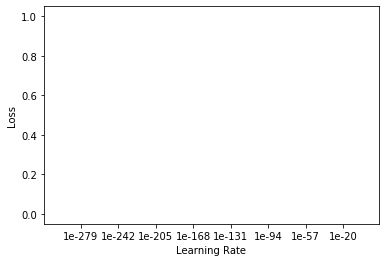

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

That's a pretty accurate model!

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

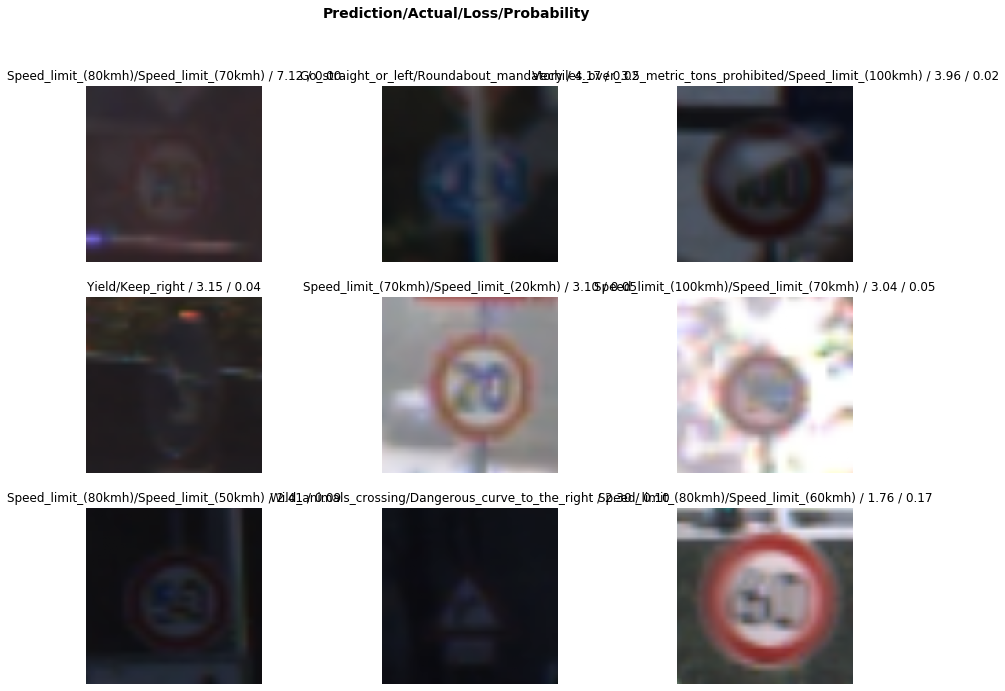

In [31]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

In [32]:
interp.most_confused(min_val=2)

[('Speed_limit_(80kmh)', 'Speed_limit_(50kmh)', 2)]

So most of the times it just gets confured about corrupted images or obfuscated signs ... good!

While the  validation loss indicates that we're not really just memorizing the dataset, the amount of parameters in resnet might just be overkill for the original 32x32 images to begin with! So this was easy but at least I familiarised myself with the library ...